## Tutorial Noten Advanced Part1: Motivsuche in Josquins Messe "La sol fa re mi" 

(Version 2022_01_03)

Inhaltsverzeichnis: 
1. Suche nach einer Tonfolge 
2. Suche nach allen Transpositionen der Tonfolge
3. Aufgaben

In diesem Tutorial wird erklärt, wie man mit Music21 nach einem melodischen Motiv in einem Werk sucht und wie man sich die genaue Positionen der Motive (Stimme, Takt, Zählzeit) anzeigen lässt. 

Wie immer startet man zunächst das Programm und lädt das zu analysierende Stück unter einem freie gewählten Variablennamen ('music') ein. Wir wählen das Kyrie aus der Messe "Missa La sol fa re mi" von Josquin (Jos1102), um dort nach der Tonfolge "La sol fa re mi"  (= A G F D E) zu suchen:

In [1]:
from music21 import * 
# mit diesem Befehl ('Run'-Button!) werden die music21-Bibliothek geladen.
# Dieser Befehl muss IMMER gestartet werden, wenn mit einem Notebook gearbeitet wird. 

In [2]:
music = converter.parse('https://analyse.hfm-weimar.de/database/02/PrJode_Jos1102_COM_1-5_MissaLasol_002_00137.xml')
# Der Kyrie-Satz wird nun intern unter der Variable 'music' geführt. 

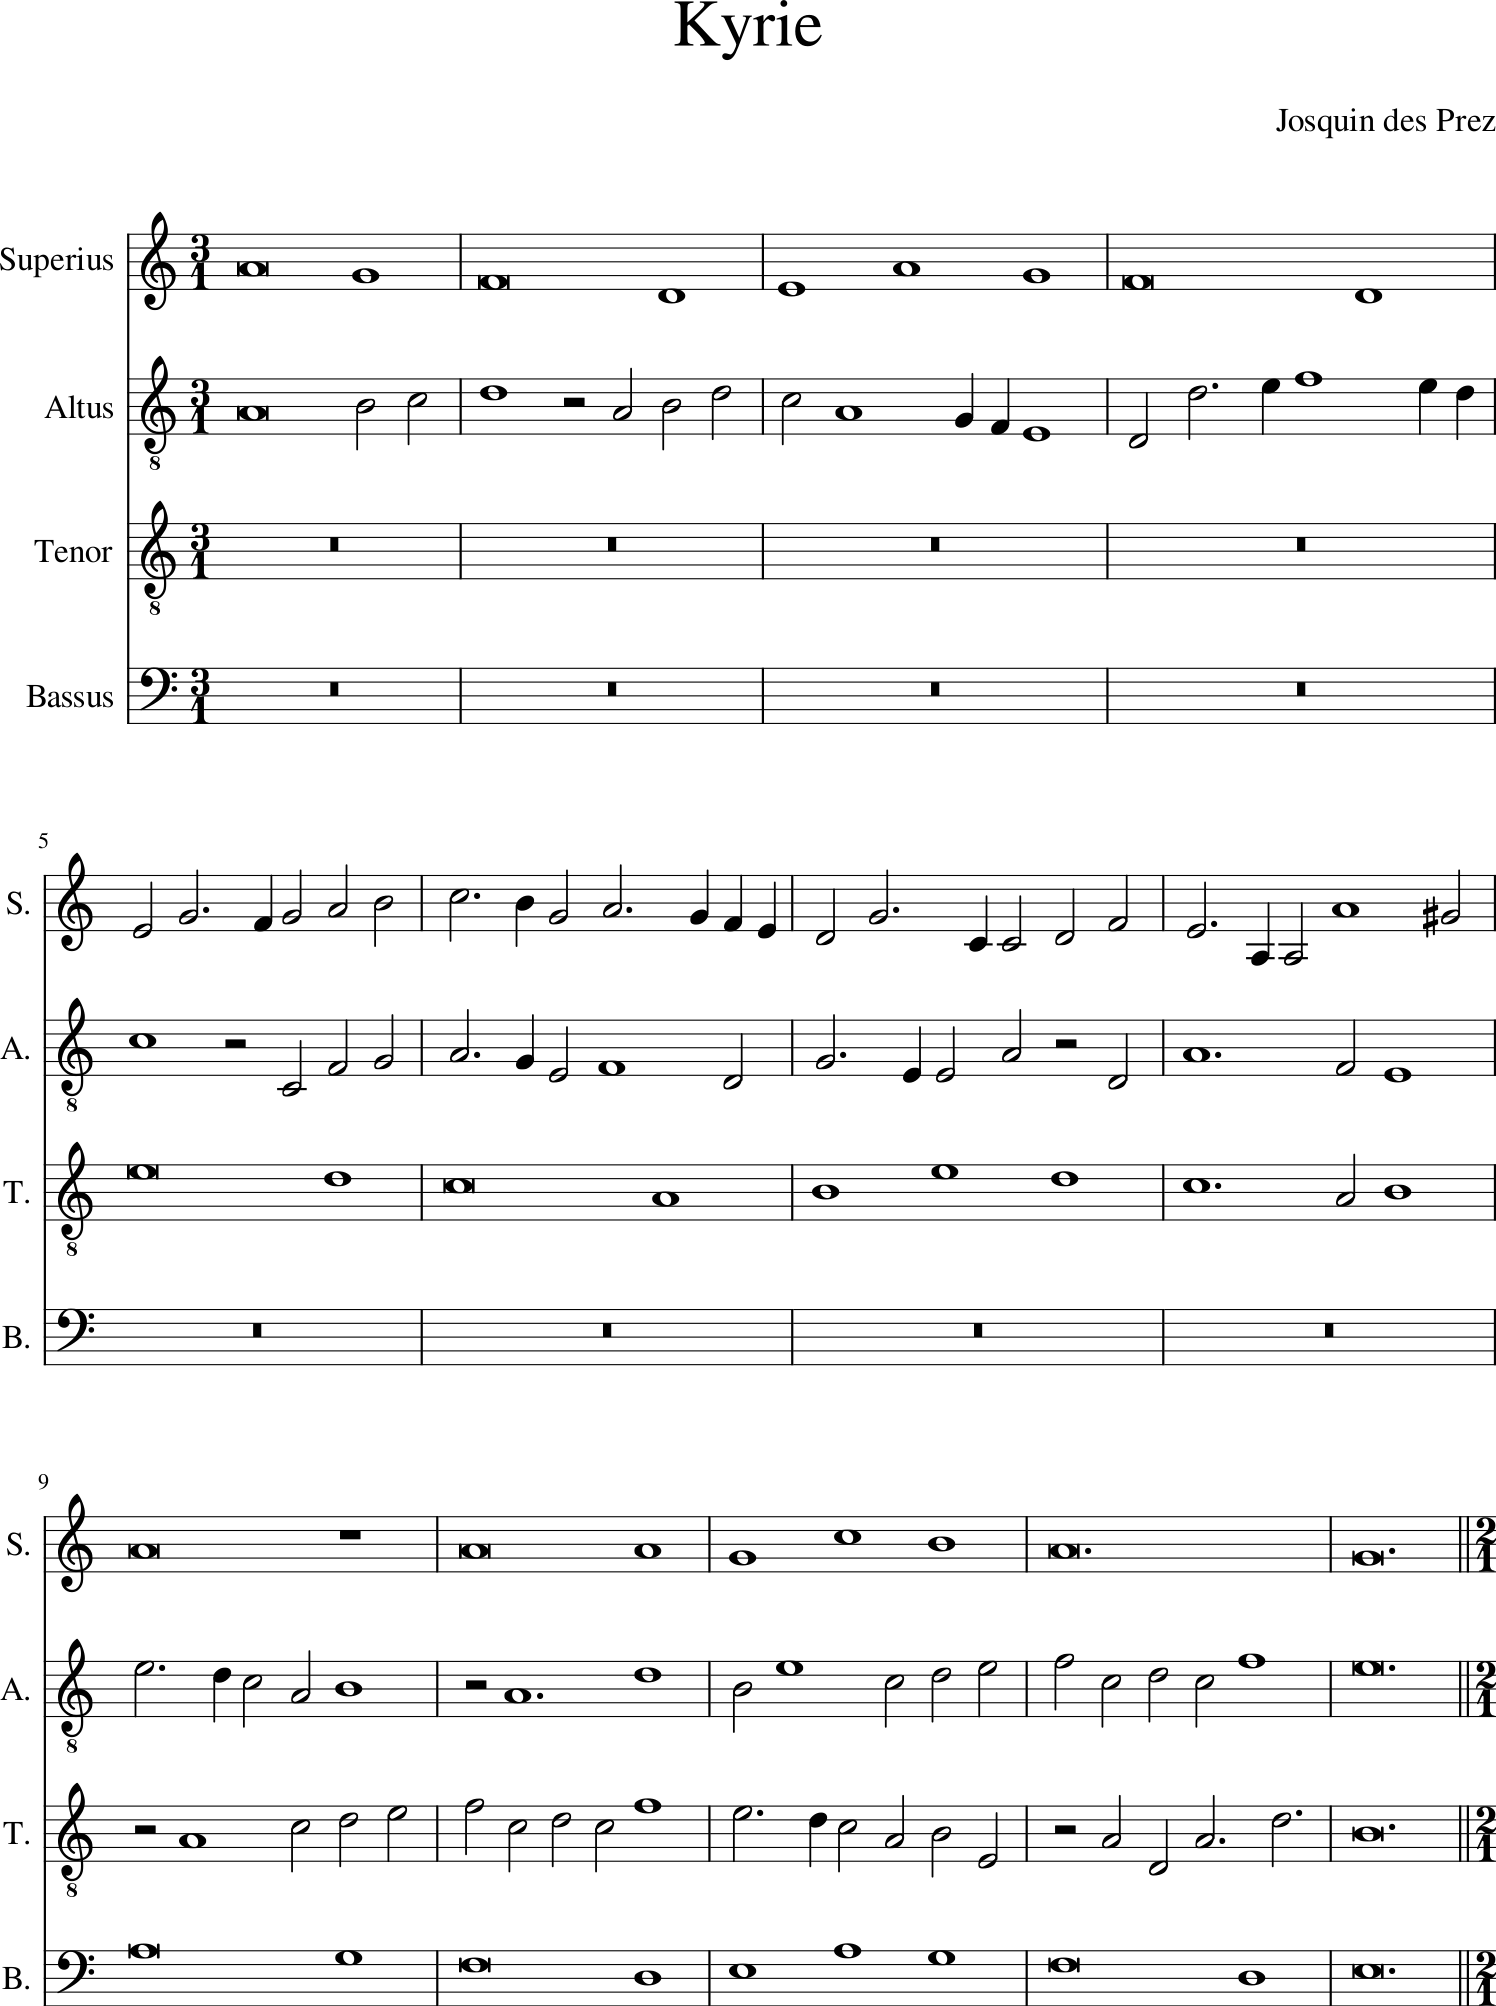

In [3]:
music.show()
# Mit diesem Befehl wird der Beginn des Notentexts angezeigt.

In [4]:
music.show('midi')
# bzw. als Audio (midi) im Browser (nur Firefox und Chrome!) geöffnet.

### 1. Suche nach einer Tonfolge

Nun müssen wir das zu suchenden Motiv eingeben. Dazu müssen wir eine sog. Stream (d.h. eine Notenfolge) erstellen, den wir "StreamMot" nennen. Wir suchen nach dem Motiv "La Sol Fa Re Mi"  (= A G F D E). Dafür geben wir es durch die interne Notation von music21 ein:

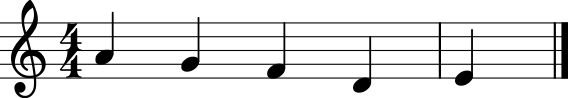

In [5]:
StreamMot = stream.Stream()
StreamMot.append(note.Note('A'))
StreamMot.append(note.Note('G'))
StreamMot.append(note.Note('F'))
StreamMot.append(note.Note('D'))
StreamMot.append(note.Note('E'))
StreamMot.show()
# als Default-Einstellung werden ein 4/4-Takt und Viertelnoten verwendet.

Da wir nur nach einer Tonhöhenfolge unabhängig vom Rhythmus suchen wollen, muss der in unserem Suchmotiv eingegebener Rhythmus ignoriert werden. 
Mit dem 'recurse'-Befehl werden alle Elemente außer der Noten aus der Datei herausgefiltert; Ergebnis dieser Filterung ist eine Notenfolge als Variable 'full_piece_stream'.

In [6]:
full_piece_stream = music.recurse().notes

Nun wird die Suche nach der melodischen Linie des Motivs durch die Funktion "search.noteNameSearch" erstellt

In [7]:
p_full_piece = search.noteNameSearch(full_piece_stream, StreamMot)
p_full_piece

[0, 5, 41, 84, 89, 94, 356, 417, 422, 427, 447, 452, 469, 475, 492, 497, 502]

Die Positionen der Ausgangstöne werden aufgelistet (als 'p_full_piece'). Diese Liste kann auf verschiedene Weise weiter ausgewertet werden: 

1. Anzahl der Motive im gesamten Notentext. 

In [8]:
len(p_full_piece)

17

2. Außerdem kann man sich die Häufigkeit des Motivs in den verschiedenen Stimmen anzeigen lassen:

In [9]:
for Part in music.getElementsByClass('Part'):
    curr_part_r = Part.recurse().notes
    p_curr_part = search.noteNameSearch(curr_part_r, StreamMot)
    print('%9s: %2d' %(Part.partName, len(p_curr_part)))

 Superius:  6
    Altus:  0
    Tenor:  4
   Bassus:  7


3. Die genaue Position im Notentext eines einzelnen Elements der Liste 'p_full_piece' wird angezeigt, wenn man die Position des Elements in eckigen Klammern setzt. So fragt man zum Beispiel nach der Position des vierten Elements (music21 beginnt die Zählung immer bei 0, daher muss man für das vierte Element eine '3' eingeben):

In [10]:
p_full_piece[3]

84

Das heißt, dass das vierte Element der Liste 'p_full_piece' ist der 84. Ton im Stream 'StreamMot' (der Liste mit  den Noten des Stücks). Wenn man  dies wiederum in eckigen Klammern setzt bekommt man weitere Infos: 

In [11]:
full_piece_stream[p_full_piece[3]]

<music21.note.Note A>

Es war  zu erwarten, dass es der Ton A (Anfangston unseres Suchmotivs) ist. 
Wichtiger ist der Takt und die genaue Zählzeit des Motivbeginns sowie die Stimme:

In [12]:
full_piece_stream[p_full_piece[3]].measureNumber

42

In [13]:
full_piece_stream[p_full_piece[3]].beat

1.0

In [14]:
full_piece_stream[p_full_piece[3]].getContextByClass('Part')

<music21.stream.Part Superius>

Dies können wir mit einem Blick in die Partitur, Takt 42, überprüfen. 

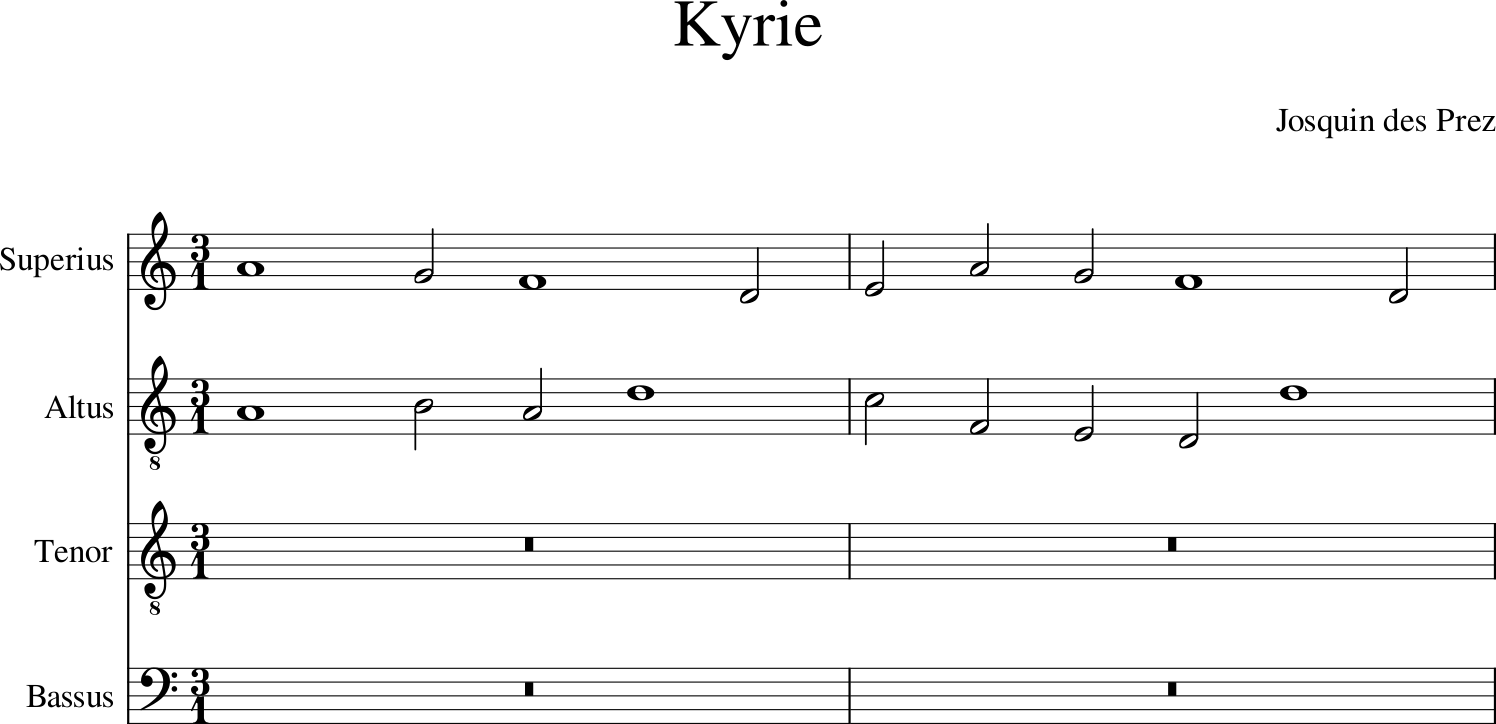

In [15]:
music.measures(42,43).show()

4. Will man all die Positionen auf einmal und für alle Motivwiederholungen auflisten, kann man sich mitdem folgenden Befehl behelfen (einem rekursiven 'Loop'-Befehl): 

In [16]:
zähler=1
for Position in p_full_piece:
        startingNote=full_piece_stream[Position]
        startingMeasure = startingNote.measureNumber
        startingBeat = startingNote.beat
        startingPart = startingNote.getContextByClass('Part')
        print('%2s %3s %3s' %(zähler, startingNote.nameWithOctave, startingMeasure), startingBeat, startingPart)
        zähler+=1

 1  A4   1 1.0 <music21.stream.Part Superius>
 2  A4   3 2.0 <music21.stream.Part Superius>
 3  A4  14 1.0 <music21.stream.Part Superius>
 4  A4  42 1.0 <music21.stream.Part Superius>
 5  A4  43 1.5 <music21.stream.Part Superius>
 6  A4  44 1.5 <music21.stream.Part Superius>
 7  A3  20 1.0 <music21.stream.Part Tenor>
 8  A3  52 1.5 <music21.stream.Part Tenor>
 9  A3  53 1.5 <music21.stream.Part Tenor>
10  A3  54 1.5 <music21.stream.Part Tenor>
11  A3   9 1.0 <music21.stream.Part Bassus>
12  A3  11 2.0 <music21.stream.Part Bassus>
13  A3  29 1.0 <music21.stream.Part Bassus>
14  A3  32 1.0 <music21.stream.Part Bassus>
15  A3  45 1.0 <music21.stream.Part Bassus>
16  A3  46 1.5 <music21.stream.Part Bassus>
17  A3  47 1.5 <music21.stream.Part Bassus>


5. Schließlich kann man die betreffenden Noten in der Partitur markieren, sei es mit einer Farbe oder einem Zeichen, z.B. *:

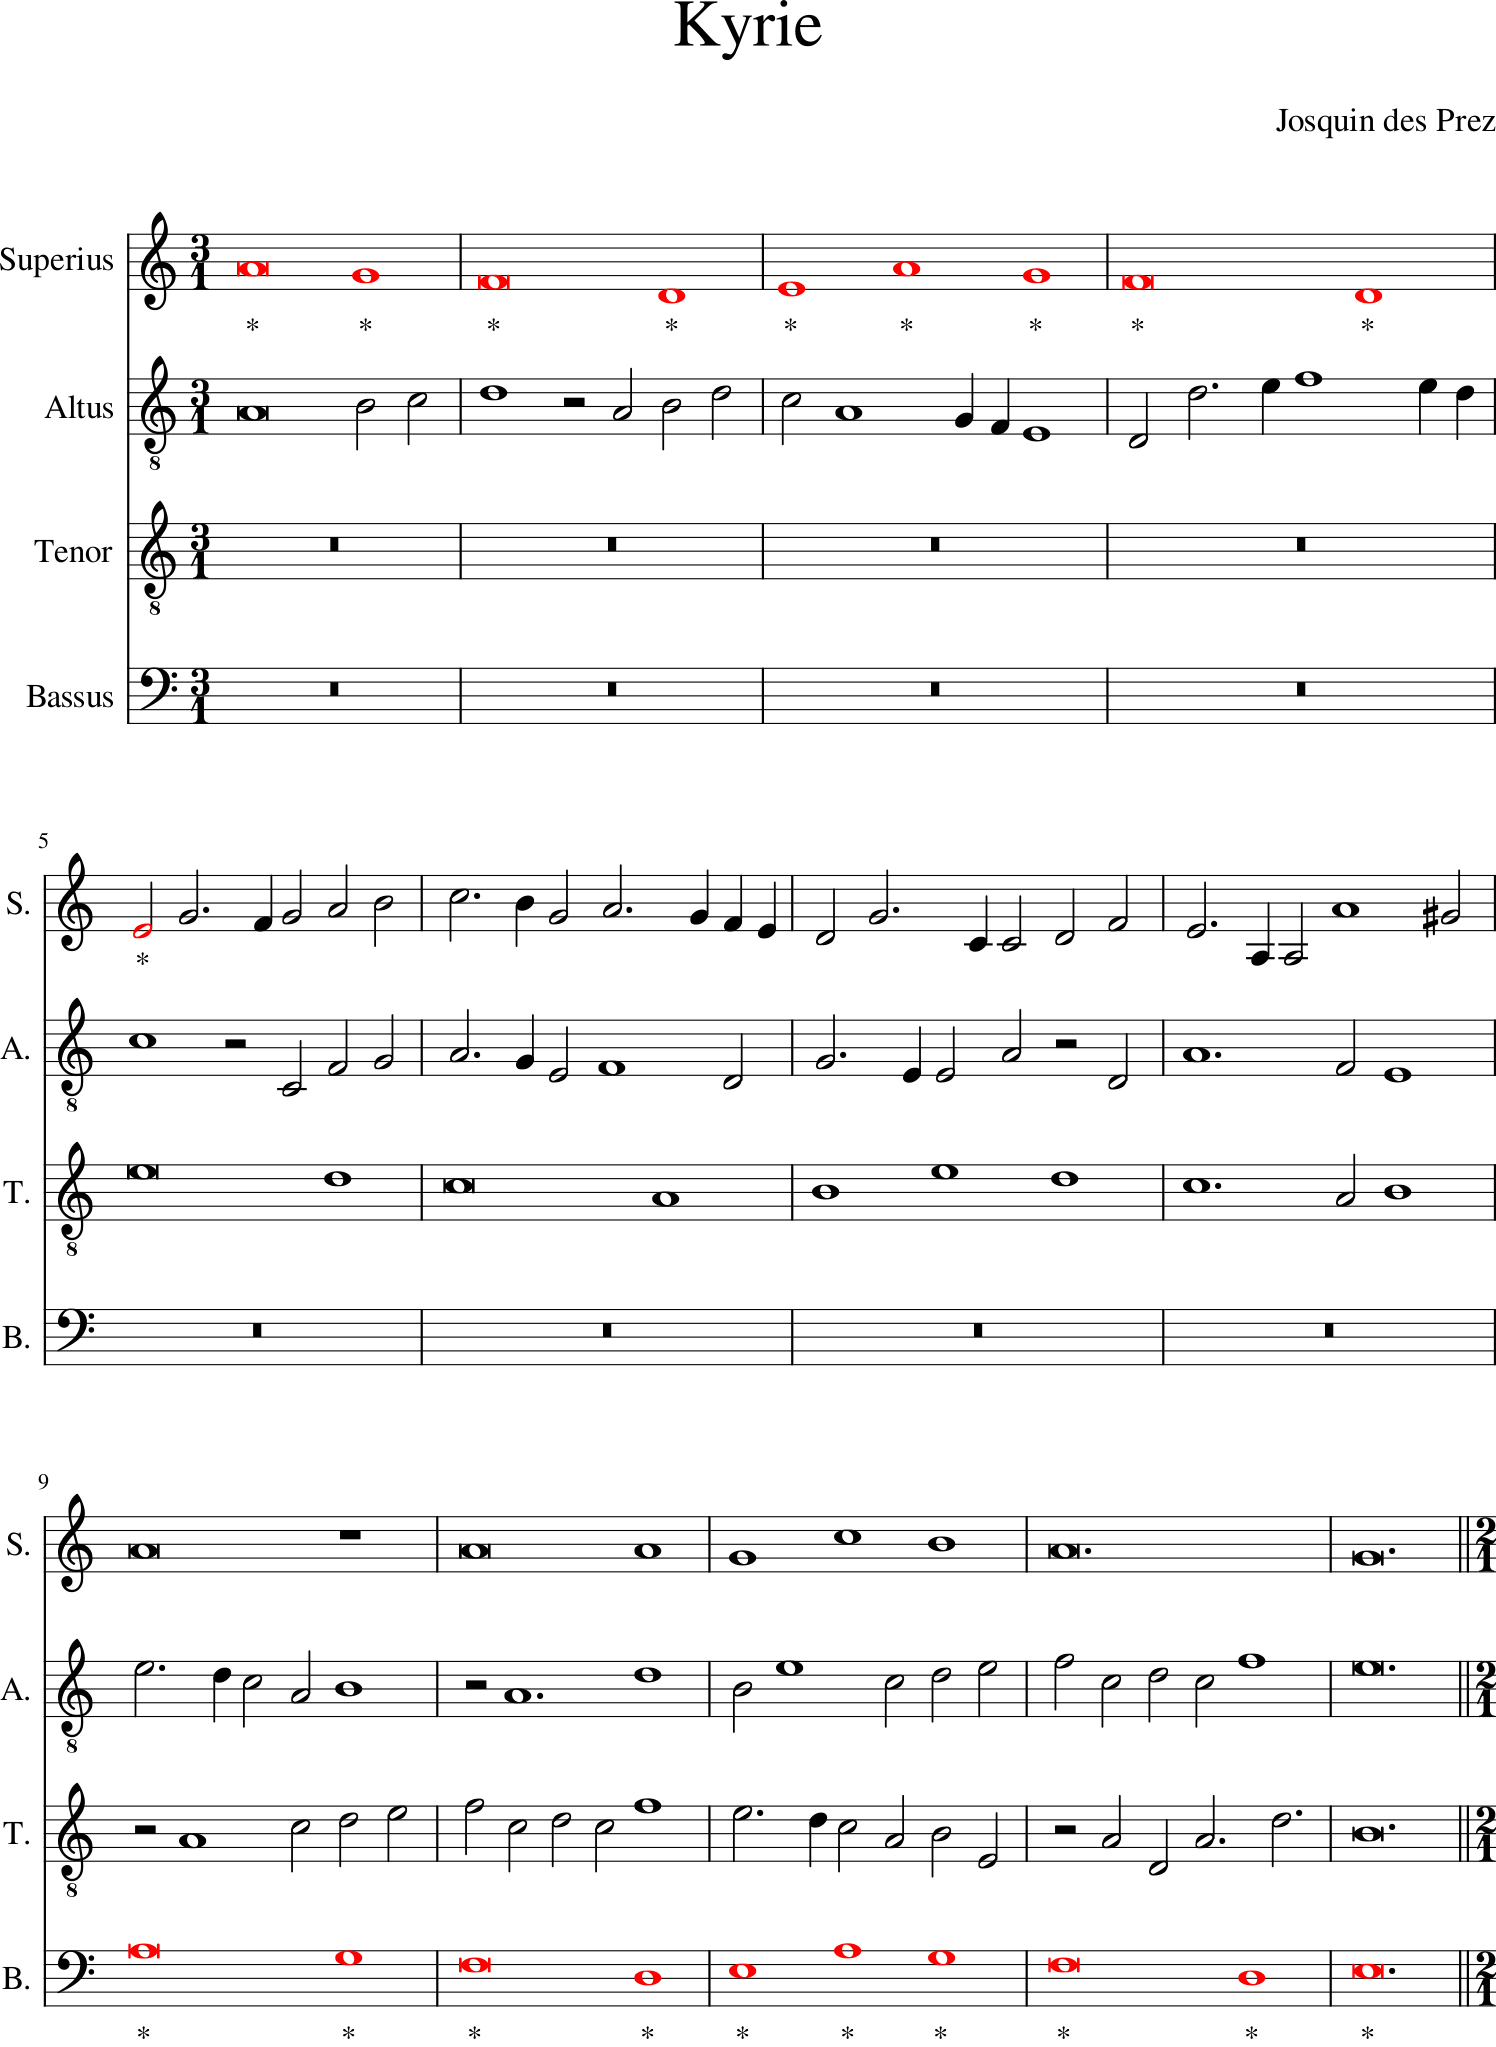

In [17]:
for found in p_full_piece:
    for ffound in range(len(StreamMot)):
        full_piece_stream[found+ffound].lyric = '*'
        full_piece_stream[found+ffound].style.color='red'

# Hier wurde die Farbe rot ('red') gewählt. 
# Versuchen Sie es mit einer anderen Farbe!
music.show()

Es ist auch möglich, die markierte Version der Partitur in eine neue Datei zu schreiben, deren Pfad ausgegeben wird und die man wiederum mit MuseScore öffnen kann:

In [18]:
music.write()
# Alternativ können Sie einen eigenen Pfad und Namen festlegen, s. oben, z.B.:
# music.write(fp="D:/Dokumente/josquin_markiert.xml")
# Hierzu müssen Sie die Raute vor dem Befehl löschen und einen lokalen Pfad auf Ihrem Computer eingeben. 

WindowsPath('C:/users/Martin/Fellowship/music21/tmpqw5t7azt.xml')

### 2. Suche nach allen Transpositionen der Tonfolge

In Music21 lässt sich ein Befehl programmieren, mit dem man auf einen Schlag nach chromatischen Transpositionen eines Motivs suchen kann. Zunächst benötigen wir folgenden Befehl: 

In [19]:
def pitchClassEqual(n1, n2):
    if not hasattr(n1, 'pitch'):
        return False
    if not hasattr(n2, 'pitch'):
        return False
    if n1.pitch.pitchClass == n2.pitch.pitchClass:
        return True
    else:
        return False

Im Folgenden wird nach dem Motiv in den 12 Tonarten (und ihre jeweilige enharmonische Equivalenten) gesucht. Dafür muss man einen Algorithmus erstellen, der 12 Mal wiederholt wird. Ein zweiter Loop trägt dazu bei, die Informationen von jeder Wiederholung in die Ergebnisliste (results) einzutragen. 

In [20]:
results = []
zähler = 1

# Die Ergebnisse müssen in einer extra Liste ("results") eingetragen werden. 
# Der "zähler" vereinfacht das Aufzählen der Töne, wenn man diese nacheinander zeigen will.

for egal in range(12):#Suche 12 Mal
    s_len = [StreamMot.notes[i].name for i in range (len(StreamMot.notes))]
    print("------------\nSearching for:", *s_len, sep='   ')
    p = search.streamSearchBase(full_piece_stream, StreamMot, algorithm=pitchClassEqual)
    for notePosition in p:
        startingNote=full_piece_stream[notePosition]
        startingMeasure = startingNote.measureNumber
        startingBeat = startingNote.beat
        startingPart = startingNote.getContextByClass('Part')
        results.append(notePosition)
        print('%2s %3s %3s' %(zähler, startingNote.nameWithOctave, startingMeasure), startingBeat, startingPart.id)
        zähler+=1
    [n.transpose(1, inPlace=True) for n in StreamMot]


#Nach jeder Suche wird alles einen halben Ton nach oben transponiert


------------
Searching for:   A   G   F   D   E
 1  A4   1 1.0 Superius
 2  A4   3 2.0 Superius
 3  A4  14 1.0 Superius
 4  A4  42 1.0 Superius
 5  A4  43 1.5 Superius
 6  A4  44 1.5 Superius
 7  A3  20 1.0 Tenor
 8  A3  52 1.5 Tenor
 9  A3  53 1.5 Tenor
10  A3  54 1.5 Tenor
11  A3   9 1.0 Bassus
12  A3  11 2.0 Bassus
13  A3  29 1.0 Bassus
14  A3  32 1.0 Bassus
15  A3  45 1.0 Bassus
16  A3  46 1.5 Bassus
17  A3  47 1.5 Bassus
------------
Searching for:   B-   G#   F#   E-   F
------------
Searching for:   B   A   G   E   F#
------------
Searching for:   C   B-   G#   F   G
------------
Searching for:   C#   B   A   F#   G#
------------
Searching for:   D   C   B-   G   A
18  D3  36 1.0 Bassus
19  D3  39 1.0 Bassus
------------
Searching for:   E-   C#   B   G#   B-
------------
Searching for:   E   D   C   A   B
20  E4   9 1.0 Altus
21  E4  15 1.0 Altus
22  E4  26 1.0 Altus
23  E4   5 1.0 Tenor
24  E4   7 2.0 Tenor
25  E4  11 1.0 Tenor
26  E4  48 1.0 Tenor
27  E4  49 1.5 Tenor
28  E4 

In [21]:
print(len(results))

34


### 3. Aufgaben

Laden Sie nun nacheinander die anderen Sätze der Missa und suchen Sie nach dem Motiv!
Sie können dazu dieses Notebook nutzen: 

1. Speichern Sie es unter einem neuen Namen ab. 
2. Laden Sie dann einen weiteren Satz (vgl. https://analyse.hfm-weimar.de/doku.php?id=prjode)
3. Tippen Sie auf 'Run' und starten Sie anschließend die weiteren Code Cells - oder wählen Sie im Menu 'Cell' -> 'Run All'. 

Wie oft kommt das Motiv in den anderen Sätzen vor? In welchen Stimmen?